In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
tncounty = gpd.read_file('data/TN_City_Boundaries.shp')
tncounty.head( )

,OBJECTID,NAME,ShapeSTAre,ShapeSTLen,geometry
0,1,Baileyton,4.476669e+07,53934.034931,"POLYGON ((2901294.500 738992.625, 2900560.500 ..."
1,2,Baneberry,5.292213e+07,76408.707964,"POLYGON ((2772027.182 640621.675, 2771763.955 ..."
2,3,Bartlett,9.069788e+08,203164.841493,"POLYGON ((809649.628 347118.597, 809731.797 34..."
3,4,Baxter,8.932216e+07,84547.326363,"POLYGON ((2079493.486 669385.728, 2079493.825 ..."
4,5,Bean Station,1.671205e+08,192883.155722,"POLYGON ((2773906.098 745431.928, 2773920.064 ..."


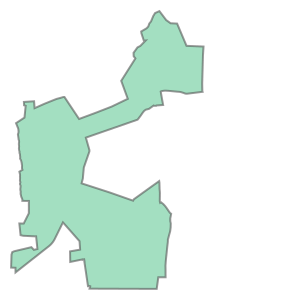

In [3]:
tncounty.loc[0, 'geometry']

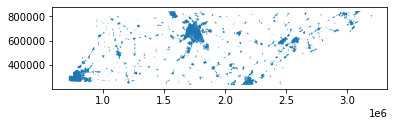

In [4]:
tncounty.plot();

In [5]:
cdcdata = pd.read_csv('data/500_Cities__Local_Data_for_Better_Health__2019_release (1).csv')
print(cdcdata.shape)
cdcdata.head()


(534, 24)


,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,TN,Tennessee,Memphis,Census Tract,BRFSS,Health Outcomes,4748000-47157008120,All teeth lost among adults aged >=65 Years,%,...,37.8,NaN,NaN,"4,393","(35.0869484061, -89.9617240752)",HLTHOUT,TEETHLOST,4748000,4.715701e+10,Teeth Loss
1,2016,TN,Tennessee,Memphis,Census Tract,BRFSS,Health Outcomes,4748000-47157005600,All teeth lost among adults aged >=65 Years,%,...,38.5,NaN,NaN,"3,802","(35.0890361265, -90.0447067021)",HLTHOUT,TEETHLOST,4748000,4.715701e+10,Teeth Loss
2,2016,TN,Tennessee,Memphis,City,BRFSS,Health Outcomes,4748000,All teeth lost among adults aged >=65 Years,%,...,23.7,NaN,NaN,"646,889","(35.1046295042, -89.978906085)",HLTHOUT,TEETHLOST,4748000,NaN,Teeth Loss
3,2016,TN,Tennessee,Murfreesboro,Census Tract,BRFSS,Health Outcomes,4751560-47149041403,All teeth lost among adults aged >=65 Years,%,...,23.9,NaN,NaN,"7,101","(35.8632696184, -86.3531192088)",HLTHOUT,TEETHLOST,4751560,4.714904e+10,Teeth Loss
4,2016,TN,Tennessee,Nashville,Census Tract,BRFSS,Health Outcomes,4752006-47037014400,All teeth lost among adults aged >=65 Years,%,...,34.6,NaN,NaN,"1,250","(36.1576629645, -86.8057331508)",HLTHOUT,TEETHLOST,4752006,4.703701e+10,Teeth Loss


In [6]:
split_data = cdcdata['GeoLocation'].str.strip(')').str.strip('(').str.split(', ')
cdcdata['lat'] = split_data.apply(lambda x: x[0])
cdcdata['long'] = split_data.apply(lambda x: x[1])



In [7]:
cdcdata.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text,lat,long
0,2016,TN,Tennessee,Memphis,Census Tract,BRFSS,Health Outcomes,4748000-47157008120,All teeth lost among adults aged >=65 Years,%,...,NaN,"4,393","(35.0869484061, -89.9617240752)",HLTHOUT,TEETHLOST,4748000,4.715701e+10,Teeth Loss,35.0869484061,-89.9617240752
1,2016,TN,Tennessee,Memphis,Census Tract,BRFSS,Health Outcomes,4748000-47157005600,All teeth lost among adults aged >=65 Years,%,...,NaN,"3,802","(35.0890361265, -90.0447067021)",HLTHOUT,TEETHLOST,4748000,4.715701e+10,Teeth Loss,35.0890361265,-90.0447067021
2,2016,TN,Tennessee,Memphis,City,BRFSS,Health Outcomes,4748000,All teeth lost among adults aged >=65 Years,%,...,NaN,"646,889","(35.1046295042, -89.978906085)",HLTHOUT,TEETHLOST,4748000,NaN,Teeth Loss,35.1046295042,-89.978906085
3,2016,TN,Tennessee,Murfreesboro,Census Tract,BRFSS,Health Outcomes,4751560-47149041403,All teeth lost among adults aged >=65 Years,%,...,NaN,"7,101","(35.8632696184, -86.3531192088)",HLTHOUT,TEETHLOST,4751560,4.714904e+10,Teeth Loss,35.8632696184,-86.3531192088
4,2016,TN,Tennessee,Nashville,Census Tract,BRFSS,Health Outcomes,4752006-47037014400,All teeth lost among adults aged >=65 Years,%,...,NaN,"1,250","(36.1576629645, -86.8057331508)",HLTHOUT,TEETHLOST,4752006,4.703701e+10,Teeth Loss,36.1576629645,-86.8057331508


In [8]:
cdcdata['CityName'].value_counts()

Memphis         180
Nashville       158
Knoxville        77
Chattanooga      56
Clarksville      36
Murfreesboro     27
Name: CityName, dtype: int64

In [9]:
cdc_geo = gpd.GeoDataFrame(cdcdata, 
                           crs = tncounty.crs, 
                           geometry = tncounty['geometry'])

In [10]:
type(cdc_geo)

geopandas.geodataframe.GeoDataFrame

In [11]:
tooth_by_county = gpd.sjoin(cdc_geo, tncounty, op = 'within')

In [12]:
tooth_by_county.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,TractFIPS,Short_Question_Text,lat,long,geometry,index_right,OBJECTID,NAME,ShapeSTAre,ShapeSTLen
0,2016,TN,Tennessee,Memphis,Census Tract,BRFSS,Health Outcomes,4748000-47157008120,All teeth lost among adults aged >=65 Years,%,...,4.715701e+10,Teeth Loss,35.0869484061,-89.9617240752,"POLYGON ((2901294.500 738992.625, 2900560.500 ...",0,1,Baileyton,4.476669e+07,53934.034931
1,2016,TN,Tennessee,Memphis,Census Tract,BRFSS,Health Outcomes,4748000-47157005600,All teeth lost among adults aged >=65 Years,%,...,4.715701e+10,Teeth Loss,35.0890361265,-90.0447067021,"POLYGON ((2772027.182 640621.675, 2771763.955 ...",1,2,Baneberry,5.292213e+07,76408.707964
2,2016,TN,Tennessee,Memphis,City,BRFSS,Health Outcomes,4748000,All teeth lost among adults aged >=65 Years,%,...,NaN,Teeth Loss,35.1046295042,-89.978906085,"POLYGON ((809649.628 347118.597, 809731.797 34...",2,3,Bartlett,9.069788e+08,203164.841493
3,2016,TN,Tennessee,Murfreesboro,Census Tract,BRFSS,Health Outcomes,4751560-47149041403,All teeth lost among adults aged >=65 Years,%,...,4.714904e+10,Teeth Loss,35.8632696184,-86.3531192088,"POLYGON ((2079493.486 669385.728, 2079493.825 ...",3,4,Baxter,8.932216e+07,84547.326363
4,2016,TN,Tennessee,Nashville,Census Tract,BRFSS,Health Outcomes,4752006-47037014400,All teeth lost among adults aged >=65 Years,%,...,4.703701e+10,Teeth Loss,36.1576629645,-86.8057331508,"POLYGON ((2773906.098 745431.928, 2773920.064 ...",4,5,Bean Station,1.671205e+08,192883.155722


In [13]:
tooth_by_county['CityName'].value_counts()

Memphis         103
Nashville        94
Chattanooga      56
Knoxville        42
Clarksville      36
Murfreesboro     15
Name: CityName, dtype: int64

In [14]:
tooth_by_county = tooth_by_county.loc[tooth_by_county['CityName'] == 'Memphis']
tooth_by_county.shape 

(103, 32)

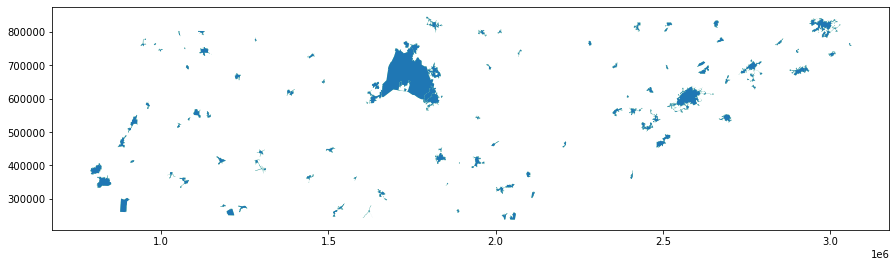

In [24]:
ax = tooth_by_county.plot(figsize = (15, 17), color = 'lightgreen')
tooth_by_county.plot( ax = ax, column = 'CityName');
plt.show();

In [25]:
map_tooth = folium.Map(location = (36.174465,-86.767960), zoom_start = 12)
map_tooth


In [26]:
i = 0
for row_index, row_values in tooth_by_county.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
Year                                                                       2016
StateAbbr                                                                    TN
StateDesc                                                             Tennessee
CityName                                                                Memphis
GeographicLevel                                                    Census Tract
DataSource                                                                BRFSS
Category                                                        Health Outcomes
UniqueID                                                    4748000-47157008120
Measure                             All teeth lost among adults aged >=65 Years
Data_Value_Unit                                                               %
DataValueTypeID                                                          CrdPrv
Data_Value_Type                                                Crude prevalence
Data_Value     

In [ ]:
#draw our zip code area: 37207
map_tooth = folium.Map(location = (36.174465,-86.767960), zoom_start = 12)

folium.GeoJson(tooth_by_county).add_to(map_tooth)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
map_37207.save('../maps/map37207.html')

#display our map
map_37207